Trying to find the average of the team to figure out the next 2022 league 
    - make sure to make the teams that are below avg, not impactful

In [189]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [190]:
lck2022_data = pd.read_csv('https://raw.githubusercontent.com/dan248lee/Esports-Project/main/2022_LoL_esports_match_data_from_OraclesElixir_20220325.csv')


In [191]:
lck2022_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47899,ESPORTSTMNT02_2673689,complete,NaN,SL,2022,NaN,0,2022-03-25 03:02:56,4,12.05,...,122.0,405.0,-212.0,15.0,1.0,0.0,0.0,1.0,0.0,0.0
47900,ESPORTSTMNT02_2673689,complete,NaN,SL,2022,NaN,0,2022-03-25 03:02:56,4,12.05,...,134.0,-221.0,-321.0,2.0,0.0,5.0,0.0,3.0,1.0,0.0
47901,ESPORTSTMNT02_2673689,complete,NaN,SL,2022,NaN,0,2022-03-25 03:02:56,4,12.05,...,16.0,567.0,13.0,3.0,2.0,3.0,3.0,0.0,4.0,4.0
47902,ESPORTSTMNT02_2673689,complete,NaN,SL,2022,NaN,0,2022-03-25 03:02:56,4,12.05,...,500.0,-2124.0,972.0,-45.0,5.0,10.0,6.0,6.0,11.0,5.0


In [192]:
#only LCK CL league games
lck2022_data=lck2022_data.loc[lck2022_data['league']=='LCK CL']
lck2022_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46831,ESPORTSTMNT02_2673276,complete,NaN,LCK CL,2022,Spring,1,2022-03-22 10:44:25,4,12.05,...,133.0,1437.0,656.0,23.0,4.0,2.0,0.0,2.0,0.0,1.0
46832,ESPORTSTMNT02_2673276,complete,NaN,LCK CL,2022,Spring,1,2022-03-22 10:44:25,4,12.05,...,134.0,1137.0,1209.0,14.0,1.0,3.0,0.0,0.0,1.0,1.0
46833,ESPORTSTMNT02_2673276,complete,NaN,LCK CL,2022,Spring,1,2022-03-22 10:44:25,4,12.05,...,28.0,138.0,321.0,-10.0,0.0,7.0,1.0,0.0,1.0,1.0
46834,ESPORTSTMNT02_2673276,complete,NaN,LCK CL,2022,Spring,1,2022-03-22 10:44:25,4,12.05,...,522.0,-4702.0,-4208.0,-8.0,2.0,5.0,9.0,9.0,17.0,2.0


In [193]:
lck2022_data=lck2022_data[['teamname','patch','result','teamkills','teamdeaths']]

In [194]:
lck2022_data['teamname']=lck2022_data['teamname'].str.replace('Challengers','')
lck2022_data

/var/folders/qp/_4g5_vx52x90343lz0clf4qc0000gn/T/ipykernel_63068/549240978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lck2022_data['teamname']=lck2022_data['teamname'].str.replace('Challengers','')


,teamname,patch,result,teamkills,teamdeaths
0,Fredit BRION,12.01,0,9,19
1,Fredit BRION,12.01,0,9,19
2,Fredit BRION,12.01,0,9,19
3,Fredit BRION,12.01,0,9,19
4,Fredit BRION,12.01,0,9,19
...,...,...,...,...,...
46831,KT Rolster,12.05,1,15,5
46832,KT Rolster,12.05,1,15,5
46833,KT Rolster,12.05,1,15,5
46834,Kwangdong Freecs,12.05,0,5,15


Teamnames: Fredit BRION, Nongshim Redforce, Liiv SANDBOX, KT Rolster, Gen.G, DWG KIA, DRX, Kwangdong Freecs,  Hanwha Life Esports
- To find the avg of 9 different teams

In [195]:
lck2022_fredit=lck2022_data[lck2022_data['teamname'].str.contains('Fredit')]
lck2022_fredit.head()

,teamname,patch,result,teamkills,teamdeaths
0,Fredit BRION,12.01,0,9,19
1,Fredit BRION,12.01,0,9,19
2,Fredit BRION,12.01,0,9,19
3,Fredit BRION,12.01,0,9,19
4,Fredit BRION,12.01,0,9,19


In [196]:
lck2022_KT=lck2022_data[lck2022_data['teamname'].str.contains('KT')]
lck2022_KT.head()

,teamname,patch,result,teamkills,teamdeaths
36,KT Rolster,12.01,1,14,5
37,KT Rolster,12.01,1,14,5
38,KT Rolster,12.01,1,14,5
39,KT Rolster,12.01,1,14,5
40,KT Rolster,12.01,1,14,5


In [197]:
lck2022_KF=lck2022_data[lck2022_data['teamname'].str.contains('Kwangdong')]
lck2022_KF.head()

,teamname,patch,result,teamkills,teamdeaths
84,Kwangdong Freecs,12.01,1,13,8
85,Kwangdong Freecs,12.01,1,13,8
86,Kwangdong Freecs,12.01,1,13,8
87,Kwangdong Freecs,12.01,1,13,8
88,Kwangdong Freecs,12.01,1,13,8


In [198]:
lck2022_DK=lck2022_data[lck2022_data['teamname'].str.contains('DWG KIA')]
lck2022_DK.head()

,teamname,patch,result,teamkills,teamdeaths
60,DWG KIA,12.01,0,16,13
61,DWG KIA,12.01,0,16,13
62,DWG KIA,12.01,0,16,13
63,DWG KIA,12.01,0,16,13
64,DWG KIA,12.01,0,16,13


In [199]:
lck2022_NR=lck2022_data[lck2022_data['teamname'].str.contains('Nongshim')]
lck2022_NR.head()

,teamname,patch,result,teamkills,teamdeaths
5,Nongshim RedForce,12.01,1,19,9
6,Nongshim RedForce,12.01,1,19,9
7,Nongshim RedForce,12.01,1,19,9
8,Nongshim RedForce,12.01,1,19,9
9,Nongshim RedForce,12.01,1,19,9


In [200]:
lck2022_LS=lck2022_data[lck2022_data['teamname'].str.contains('Liiv')]
lck2022_LS.head()

,teamname,patch,result,teamkills,teamdeaths
17,Liiv SANDBOX,12.01,1,16,3
18,Liiv SANDBOX,12.01,1,16,3
19,Liiv SANDBOX,12.01,1,16,3
20,Liiv SANDBOX,12.01,1,16,3
21,Liiv SANDBOX,12.01,1,16,3


In [201]:
lck2022_Gen=lck2022_data[lck2022_data['teamname'].str.contains('Gen')]
lck2022_Gen.head()

,teamname,patch,result,teamkills,teamdeaths
41,Gen.G,12.01,0,5,14
42,Gen.G,12.01,0,5,14
43,Gen.G,12.01,0,5,14
44,Gen.G,12.01,0,5,14
45,Gen.G,12.01,0,5,14


In [202]:
lck2022_DRX=lck2022_data[lck2022_data['teamname'].str.contains('DRX')]
lck2022_DRX.head()

,teamname,patch,result,teamkills,teamdeaths
65,DRX,12.01,1,13,16
66,DRX,12.01,1,13,16
67,DRX,12.01,1,13,16
68,DRX,12.01,1,13,16
69,DRX,12.01,1,13,16


In [203]:
lck2022_HL=lck2022_data[lck2022_data['teamname'].str.contains('Hanwha')]
lck2022_HL.head()

,teamname,patch,result,teamkills,teamdeaths
89,Hanwha Life Esports,12.01,0,8,13
90,Hanwha Life Esports,12.01,0,8,13
91,Hanwha Life Esports,12.01,0,8,13
92,Hanwha Life Esports,12.01,0,8,13
93,Hanwha Life Esports,12.01,0,8,13


In [204]:
lck2022_fredit['result'].value_counts()

0    114
1     72
Name: result, dtype: int64

In [205]:
lck2022_KT['result'].value_counts()

1    138
0    102
Name: result, dtype: int64

In [206]:
lck2022_KF['result'].value_counts()

0    120
1    114
Name: result, dtype: int64

In [207]:
lck2022_DK['result'].value_counts()

1    114
0     84
Name: result, dtype: int64

In [208]:
lck2022_NR['result'].value_counts()

0    126
1    108
Name: result, dtype: int64

In [209]:
lck2022_LS['result'].value_counts()

0    132
1     84
Name: result, dtype: int64

In [210]:
lck2022_Gen['result'].value_counts()

0    108
1     90
Name: result, dtype: int64

In [211]:
lck2022_DRX['result'].value_counts()

1    162
0     42
Name: result, dtype: int64

In [232]:
lck2022_HL['result'].value_counts()

0    138
1     48
Name: result, dtype: int64

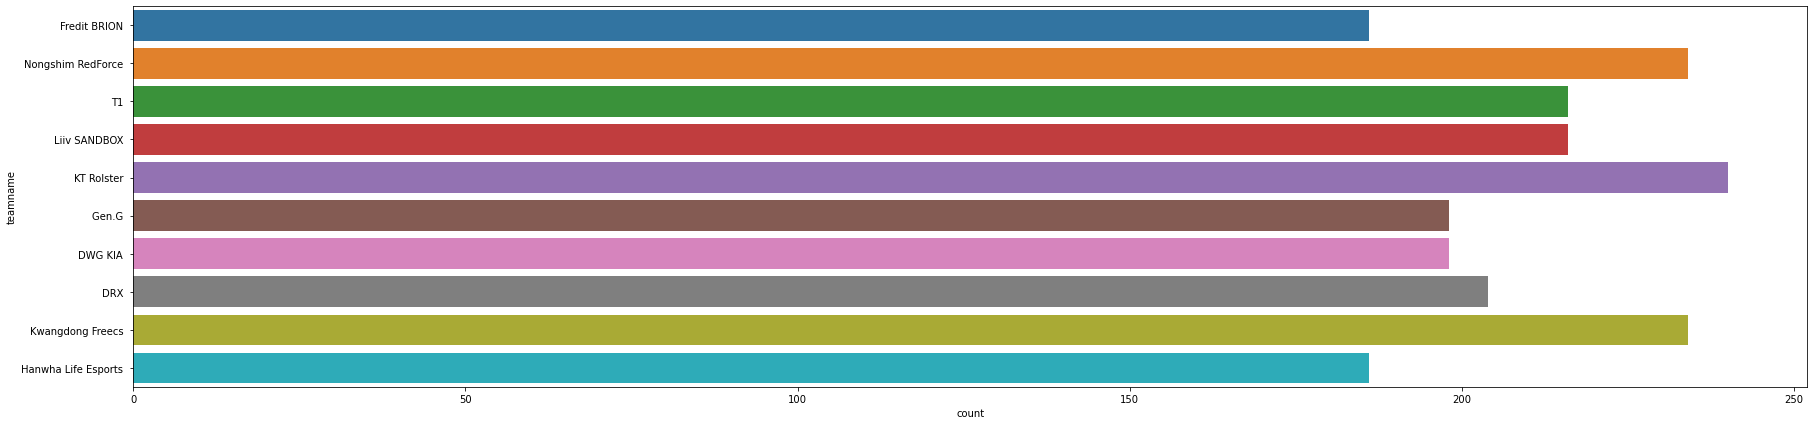

In [229]:
plt.figure(figsize = (30,7))
sns.countplot(y ='teamname', data = lck2022_data)
f1 = plt.gcf()

<AxesSubplot:ylabel='Count'>

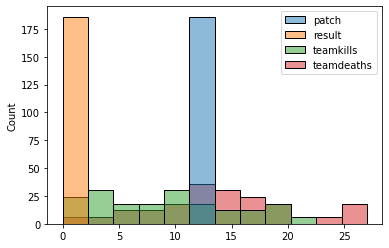

In [228]:
sns.histplot(lck2022_HL)